<a href="https://colab.research.google.com/github/ericriveraisme/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/ERIC_RIVERA_COMPLETE_of_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# TODO - code!

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
%matplotlib inline

In [2]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return (prob_positive_drunk * prob_drunk_prior) / prob_positive

prob_drunk_given_positive(0.001, 0.08, 1)

0.0125

In [3]:
help(st.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

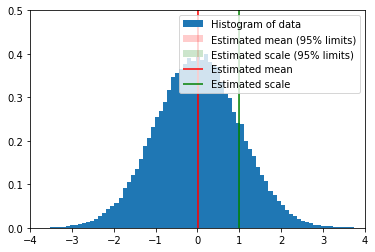

In [6]:
data = [6, 9, 12, 7, 8, 8, 13]
mean, var, std = st.bayes_mvs(data)


n_samples = 100000
data = st.norm.rvs(size=n_samples)
res_mean, res_var, res_std = st.bayes_mvs(data, alpha=0.95)
    

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, bins=100, density=True, label='Histogram of data')
ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
           alpha=0.2, label=r'Estimated mean (95% limits)')
ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
           label=r'Estimated scale (95% limits)')
    
ax.legend(fontsize=10)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.show();

In [0]:
def confidence_interval(data, confidence=0.95):
  mean = sum(data)/len(data)
  data = np.array(data)
  stderr = st.sem(data)
  interval = stderr * st.t.ppf((1 + confidence) / 2., len(data) - 1)
  return (mean, mean-interval, mean+interval)

In [0]:
import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
names = ['party', 'handicapped-infants', 'water-project', 'budget',
         'physician-fee-freeze', 'el-salvador-aid', 'religious_groups_in_schools',
         'anti-satellite-test-ban', 'aid-to-contras', 'mx-missle', 'immigration',
         'synfuels-corp-cutback','education-spending','superfund-right-to-sue',
         'crime', 'duty-free-exports', 'export-SAfrica']
df = pd.read_csv(url, header=None, names=names)
df = df.replace({'?':np.nan, 'n':0, 'y':1, 'democrat':1, 'republican':0})

In [0]:
budget = df[['party', 'budget']].dropna()
budget = budget.set_index(budget.party)
budget = budget['budget']

In [9]:
budget.shape

(424,)

In [10]:
budget.count()

424

In [16]:
ttestconfidence = confidence_interval(budget, confidence=0.99)
print(ttestcondfidence)
ttestconfidence[0]

(0.5966981132075472, 0.5349813771148968, 0.6584148493001976)


0.5966981132075472

In [30]:
bayesmean, bayesvar, bayesstd = st.bayes_mvs(budget)
bayesmean

Mean(statistic=0.5966981132075472, minmax=(0.5573791816376577, 0.6360170447774367))

In [31]:
bayesvar

Variance(statistic=0.2423643167660109, minmax=(0.2161985849641155, 0.2711389399516659))

In [32]:
bayesstd

Std_dev(statistic=0.4920128497210816, minmax=(0.4649715958680869, 0.5207100344257501))

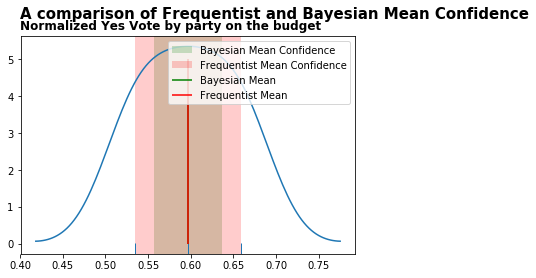

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.distplot(ttestconfidence, hist=False, rug=True);
ax.vlines(bayesmean.statistic, 0, 5, colors='g', label='Bayesian Mean')
ax.axvspan(bayesmean.minmax[0],bayesmean.minmax[1], facecolor='g',
           alpha=0.2, label='Bayesian Mean Confidence')
ax.vlines(ttestconfidence[0], 0, 5, colors='r', label='Frequentist Mean')
ax.axvspan(ttestconfidence[1], ttestconfidence[2], facecolor='r',
           alpha=0.2, label='Frequentist Mean Confidence')
ax.text(0.40, 6.1, 'A comparison of Frequentist and Bayesian Mean Confidence', fontsize=15, fontweight='bold')
ax.text(0.40, 5.8, 'Normalized Yes Vote by party on the budget', fontsize=12, fontweight='bold')
ax.legend(loc='upper right');

# **Well by the very definition of the frequentist data, it's the most likely probability come to life in the data, e.g. Occam's Razor. It's great for taking out the least likely outcomes within the data. Whereas, when implimenting Bayesian statistics, we take in the prior data before we observed it to calculate a better inference.**

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)